In [1]:
library(stm)
library(Matrix)
library(CountClust)

Loading required package: ggplot2



In [2]:
plot_factor = function(EF,k,main=NULL){
  plot(EF[,1],type='l',ylab='',xlab='base',main=main,ylim=range(EF))
  if(k>1){
    for(i in 2:k){
    lines(EF[,i],col=i,lty=i)
  }
  }
}


#'@param K number of factors to be plot
summary_study = function(fit,K,gene=NULL,method='stm'){
  # plot factors 
  p = ncol(fit$geneCounts)
  idx1 = 1:p
  if(method=='stm'){
    EF = fit$fit_stm$EF
  }
    else if (method=='sgom'){
    EF = t(fit$fit_sgom$phi)
  }else if(method=='NMF'){
    EF = t(fit$fit_NMF$H)
  }else if(method=='hals'){
    EF = t(fit$fit_hals$V)
  }
  par(mfrow=c(3,1))
  for(k in 1:K){
      rna_ymax <- max(max(EF[idx1,k]), 1e-3)
      plot(EF[idx1,k],type='l',ylab='',xlab='base',main=c(paste(gene, 'factor',k),'RNA'),col=2, ylim=c(0, rna_ymax))
    }
}


# Factors in OAS1

I ran the SGoM model with k=5, around gene OAS1.

In [ ]:
BCL2L1.sgom_K5.rds  HMGN3.sgom_K5.rds  OAS1.sgom_K5.rds  PTBP1.sgom_K5.rds  SLC25A3.sgom_K5.rds
GPX3.sgom_K5.rds    MAPT.sgom_K5.rds   PSAP.sgom_K5.rds  RPN2.sgom_K5.rds   SRSF3.sgom_K5.rds

In [7]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)
save_fit <- function(gene_name) {
    
    fit = readRDS(paste('../code/stm_models/', gene_name, '.sgom_K5.rds', sep=''))
    summary_study(fit, 5, method='sgom', gene=gene_name)

    x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

    colnames(x) <- colnames(fit$geneCounts)
    write.table(x, paste('../../plots/stm_plots/', gene_name, '_stm.tab', sep=''), sep='\t', quote=FALSE)

    phi <- fit$fit_sgom$phi
    colnames(phi) <- colnames(fit$geneCounts)
    rownames(phi) <- c('factor1', 'factor2', 'factor3', 'factor4', 'factor5')
    write.table(phi, paste('../../plots/stm_plots/', gene_name, '_factors.tab', sep=''), sep='\t', quote=FALSE)

    library(CountClust)

    # row.names(fit$geneCounts) <- row.names(annotation)
    # row.names(fit$fit_sgom$pi) <- row.names(annotation)

    indis = row.names(fit$geneCounts)
    tissue_label = c()
    tissue_label <- annotation[rownames(fit$geneCounts),]$tissue_id
    annotation = data.frame(sample_id = indis,tissue_label = tissue_label)
    EL = fit$fit_sgom$pi
    
    colnames(EL) <- c('factor1', 'factor2', 'factor3', 'factor4', 'factor5')
    
    write.table(EL, paste('../../plots/stm_plots/', gene_name, '_loadings.tab', sep=''), sep='\t', quote=FALSE)
    
    print(StructureGGplot(EL,annotation = annotation,
                      palette = RColorBrewer::brewer.pal(5,  "Paired"),
                      ))
}

In [8]:
gene_list <- c('BCL2L1',  'HMGN3', 'OAS1', 'PTBP1',  'SLC25A3',
'GPX3',    'MAPT',   'PSAP',  'RPN2',  'SRSF3')

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


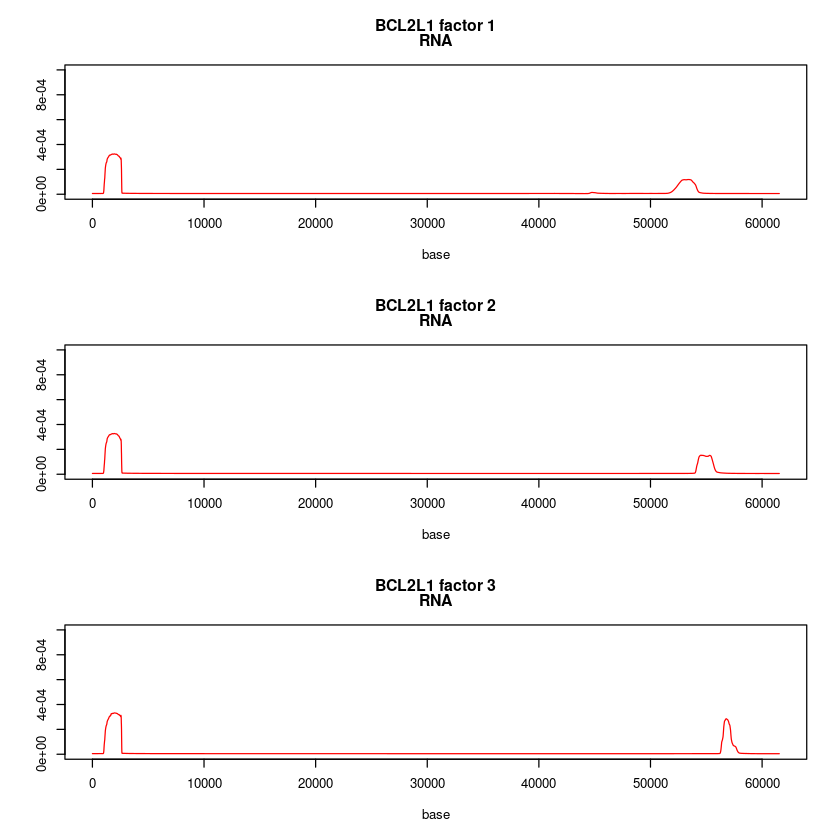

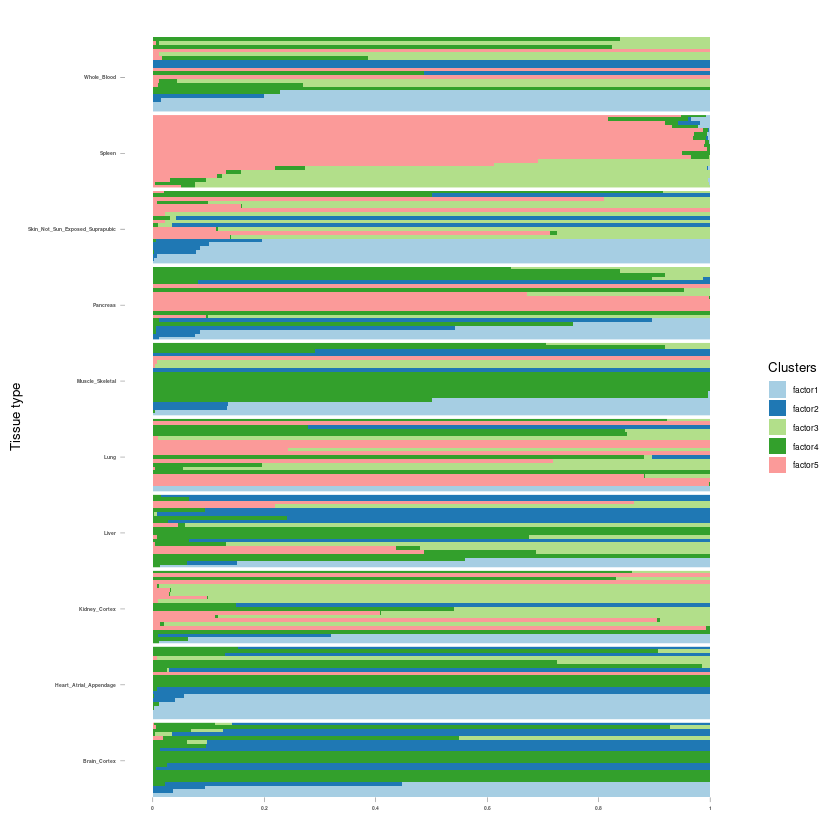

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


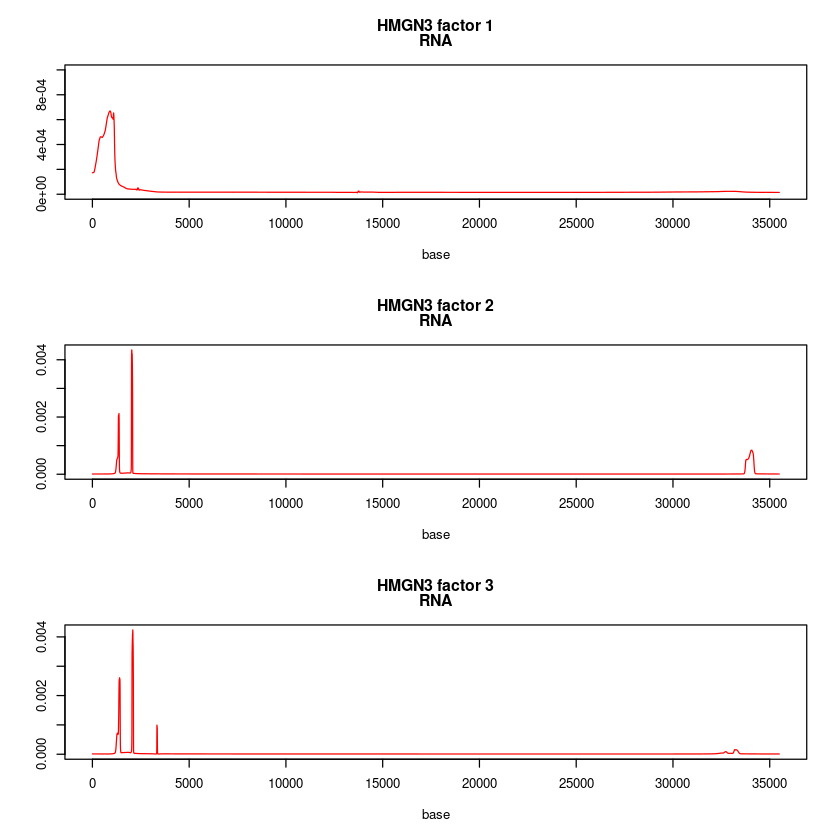

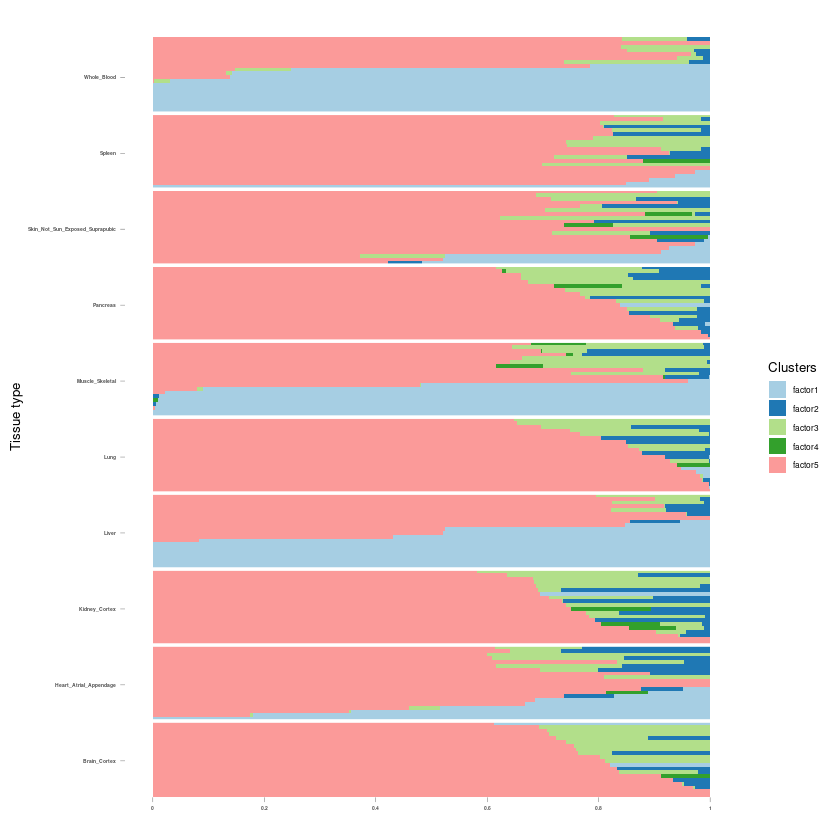

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


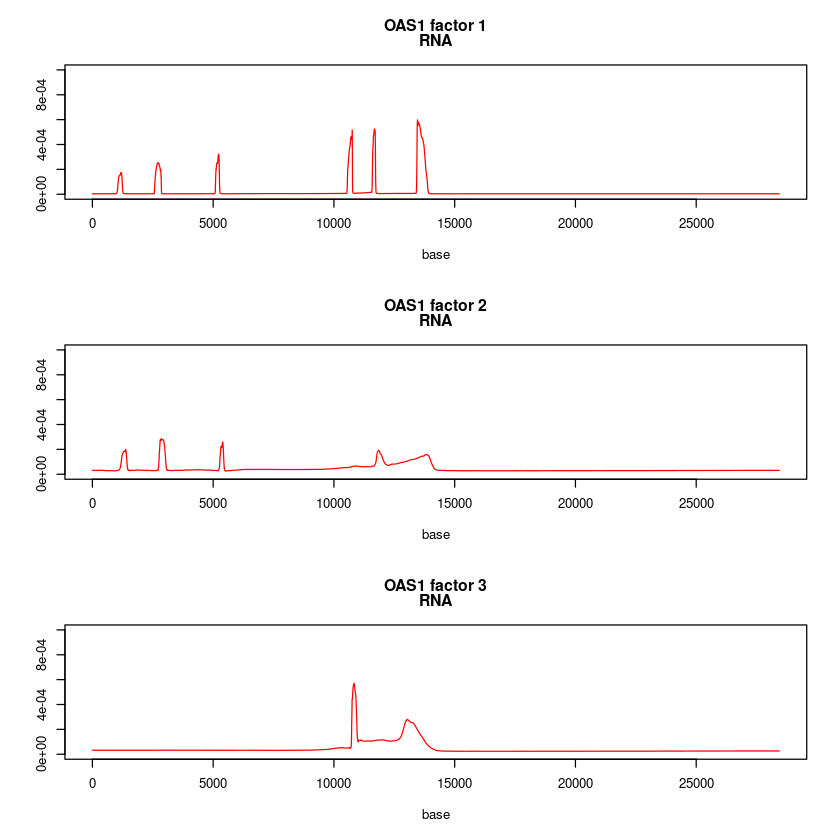

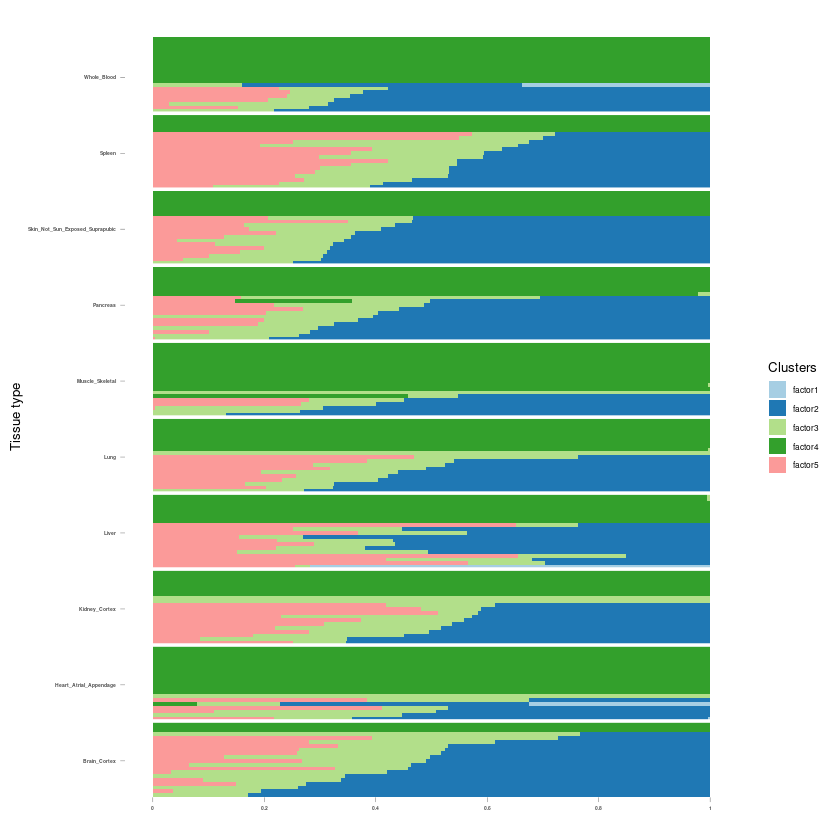

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


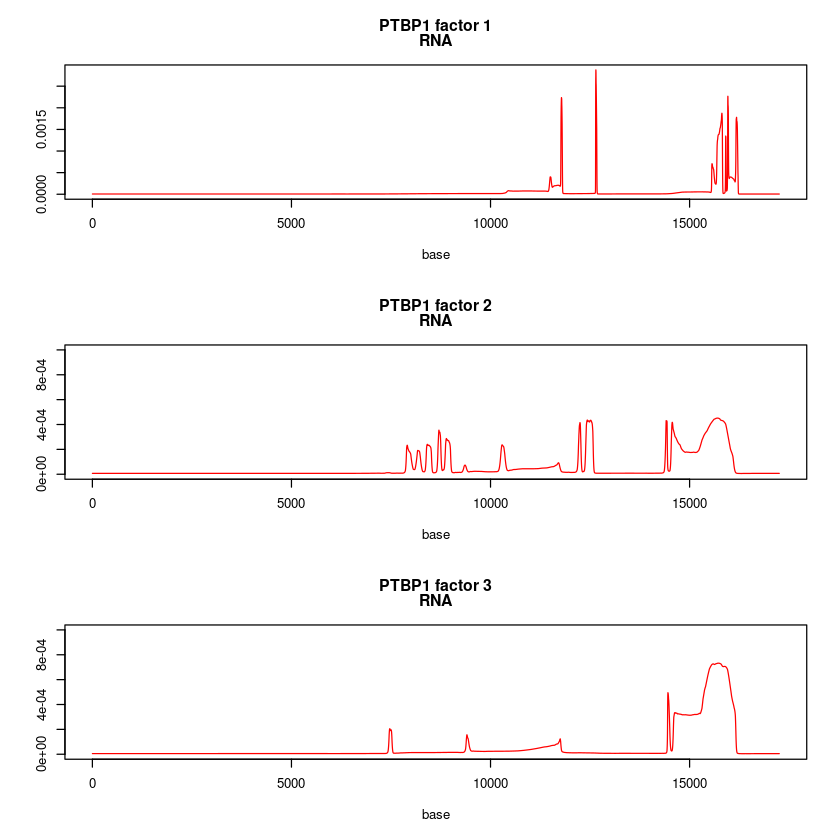

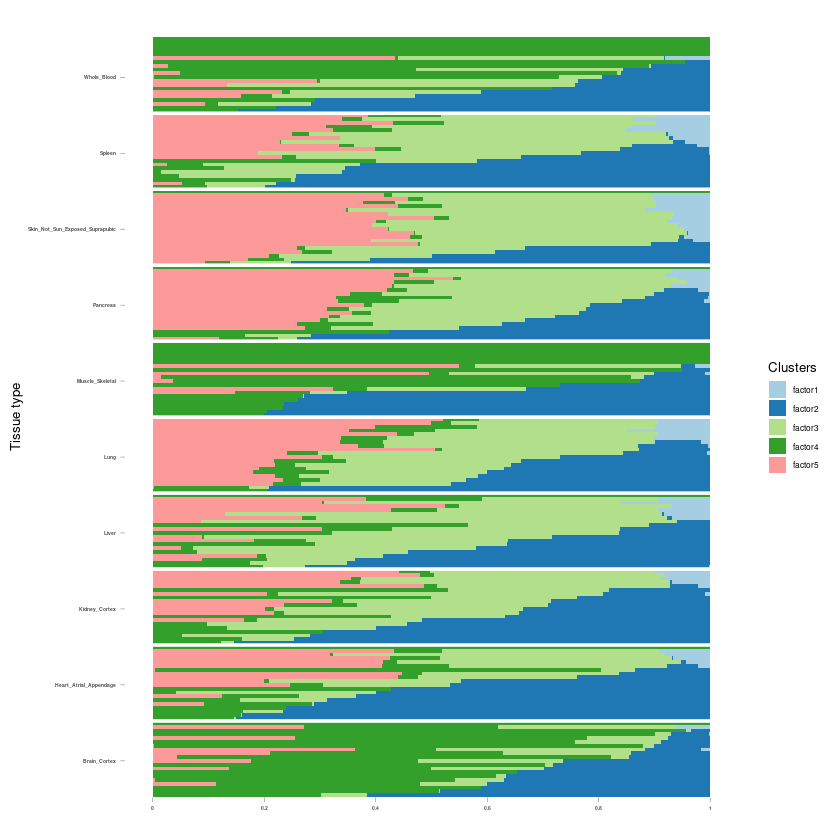

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


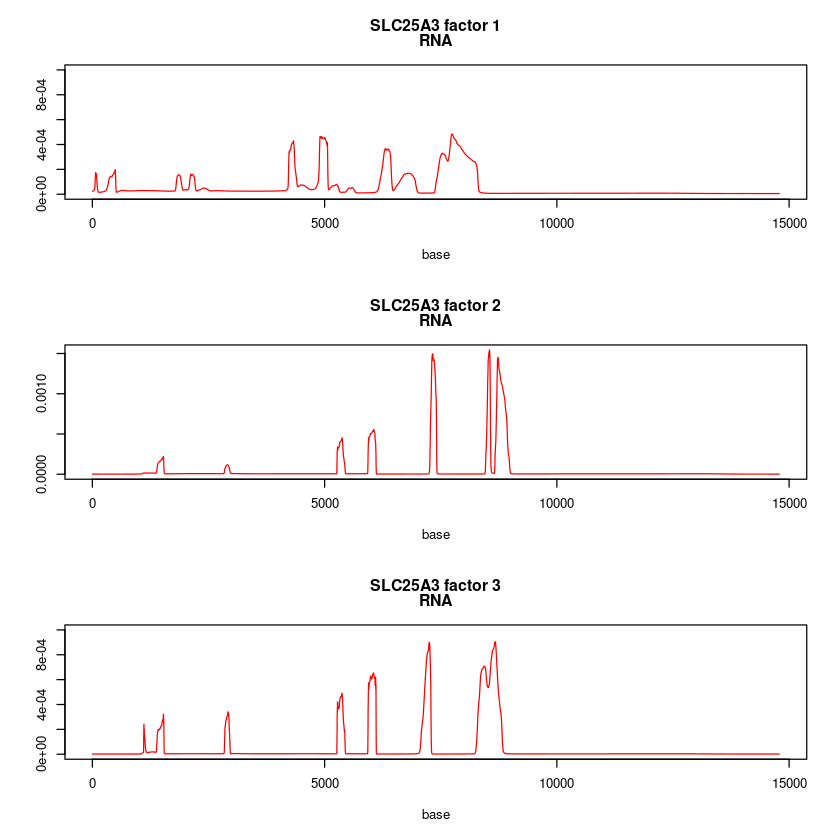

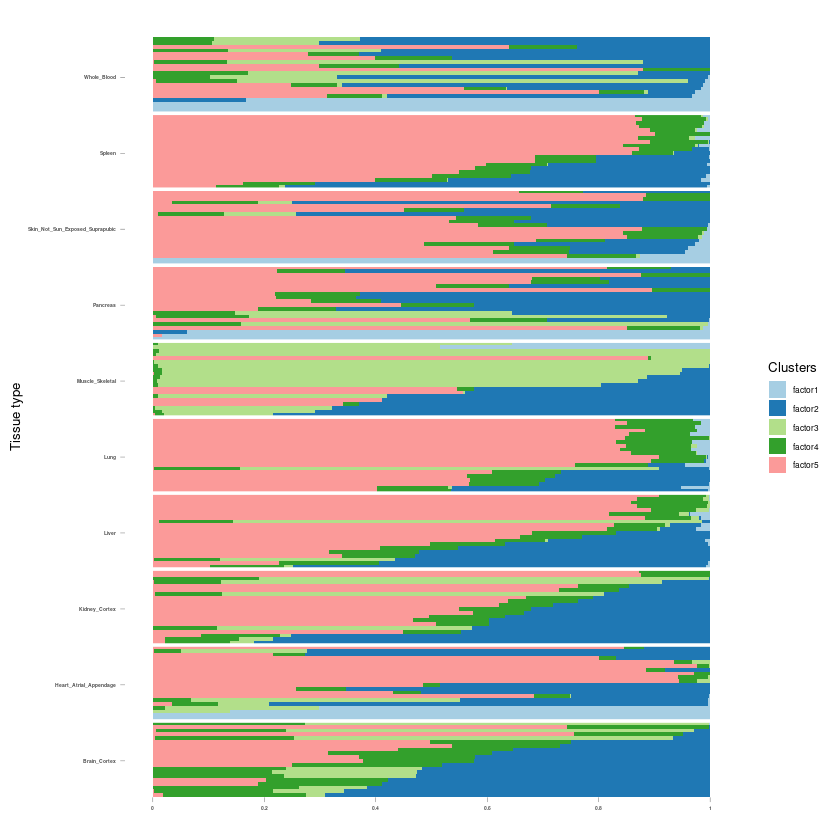

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


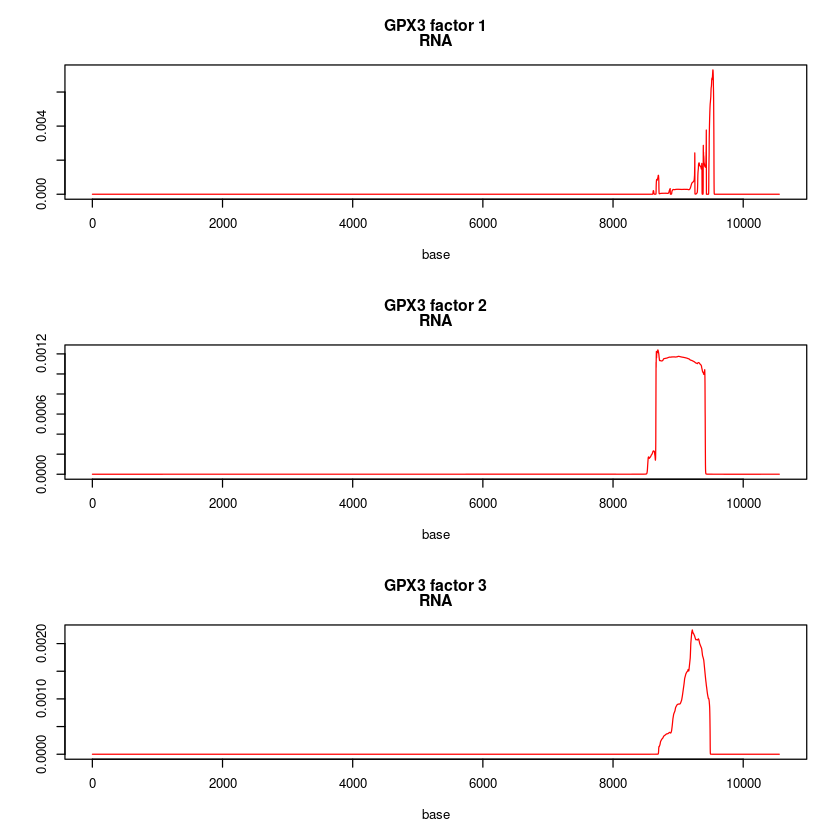

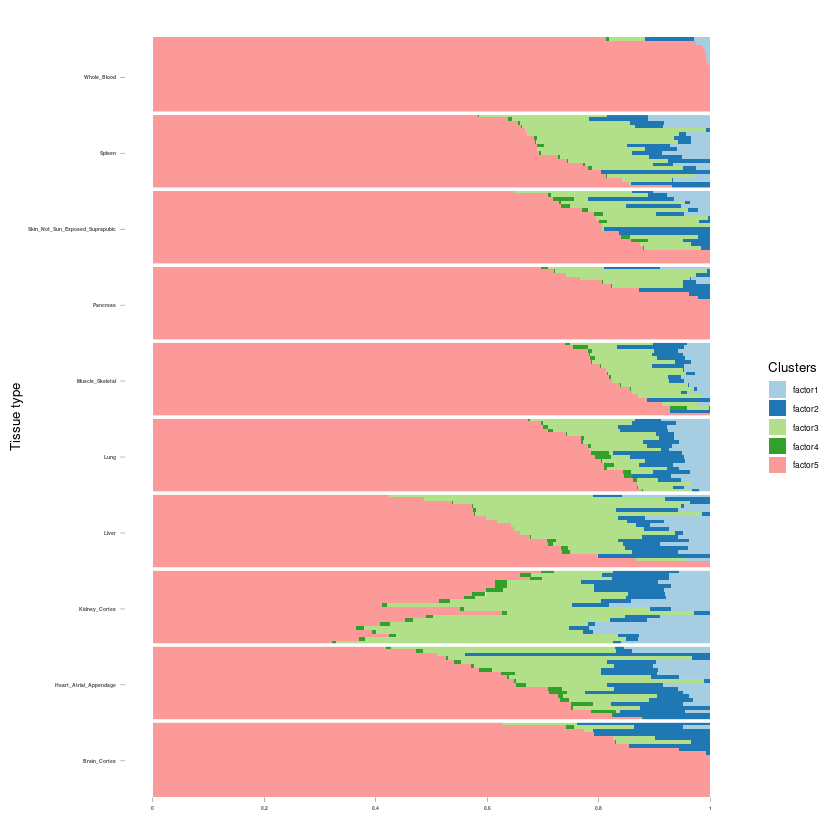

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


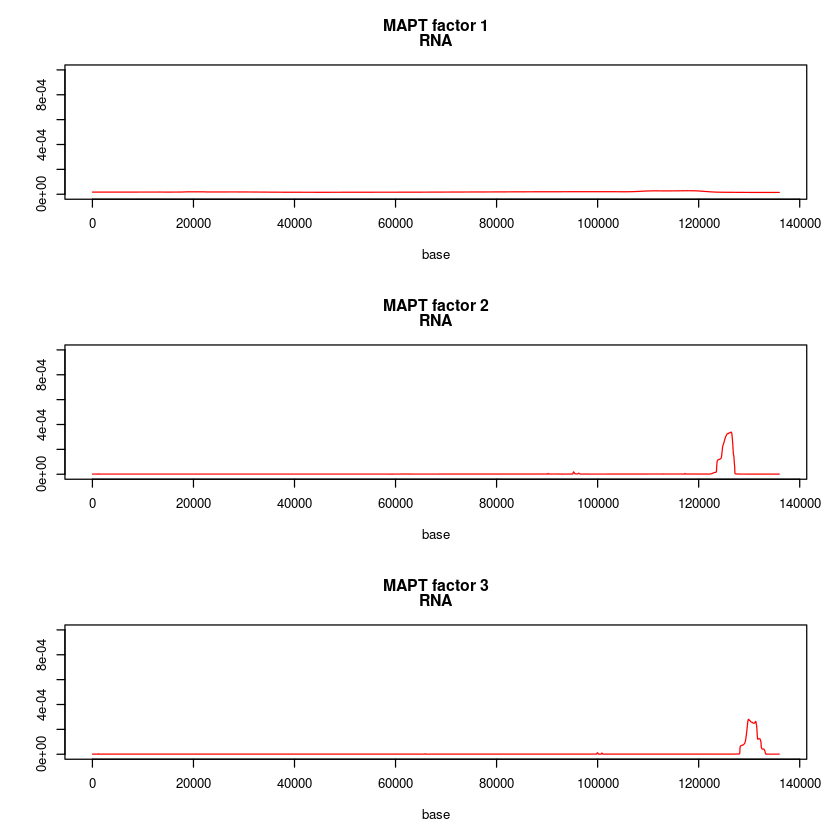

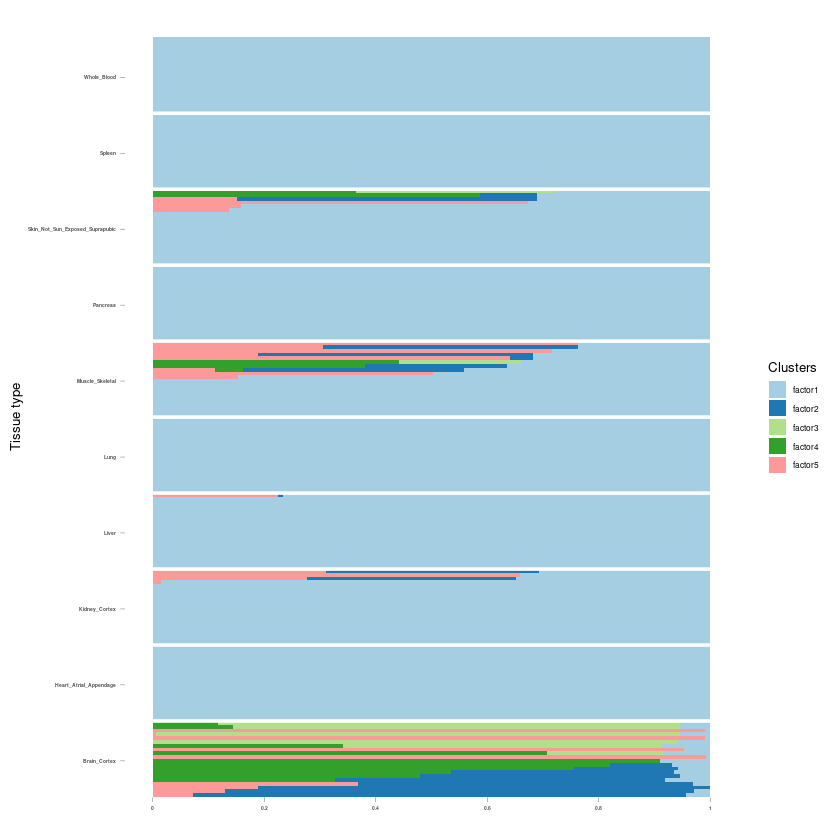

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


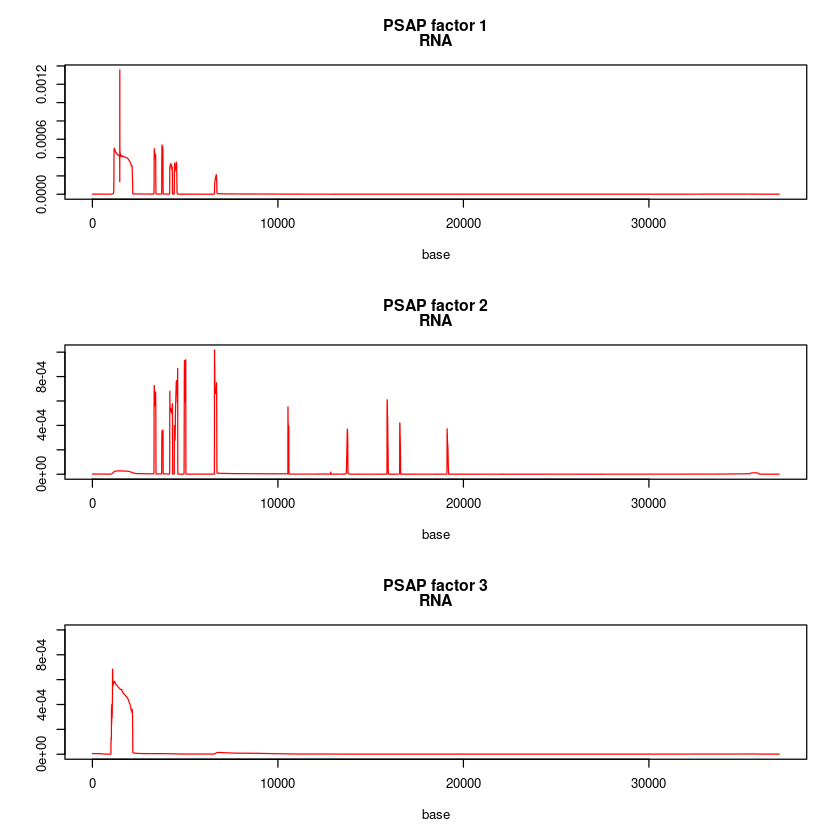

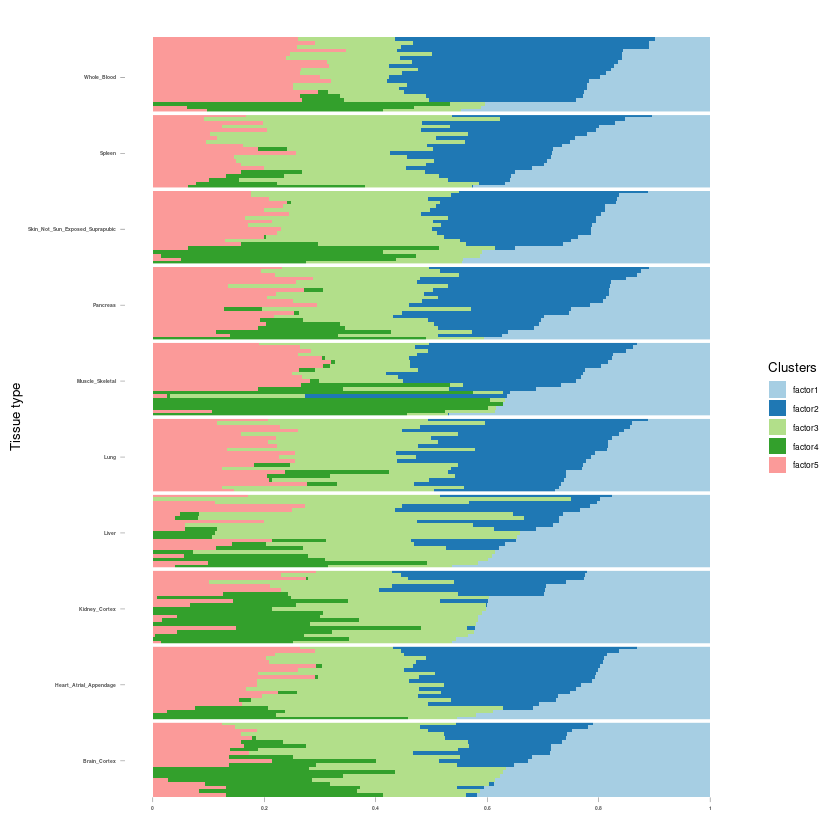

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


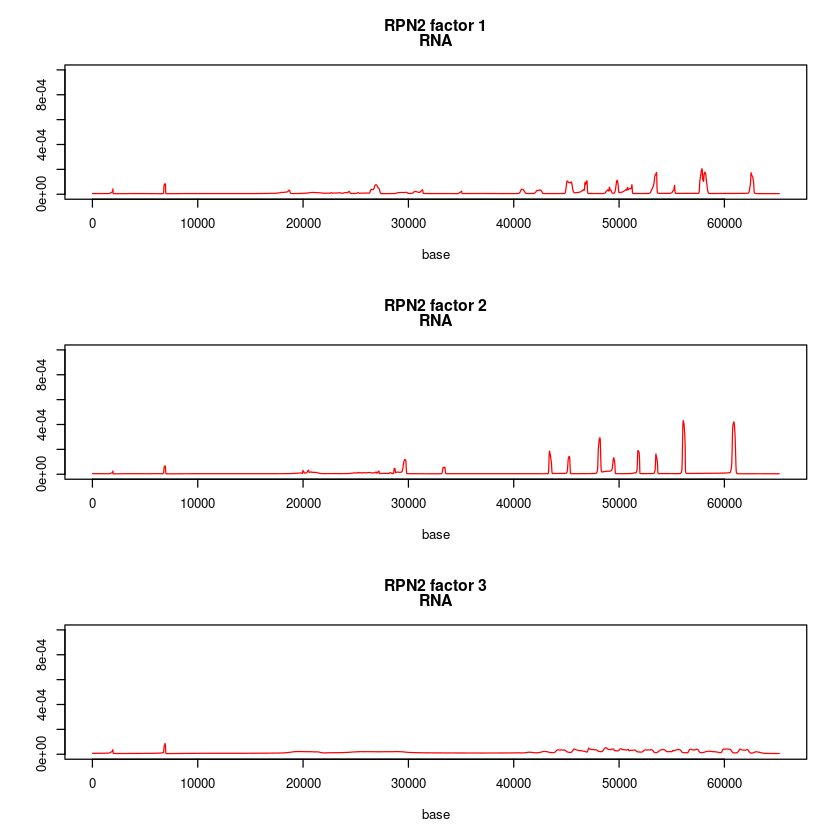

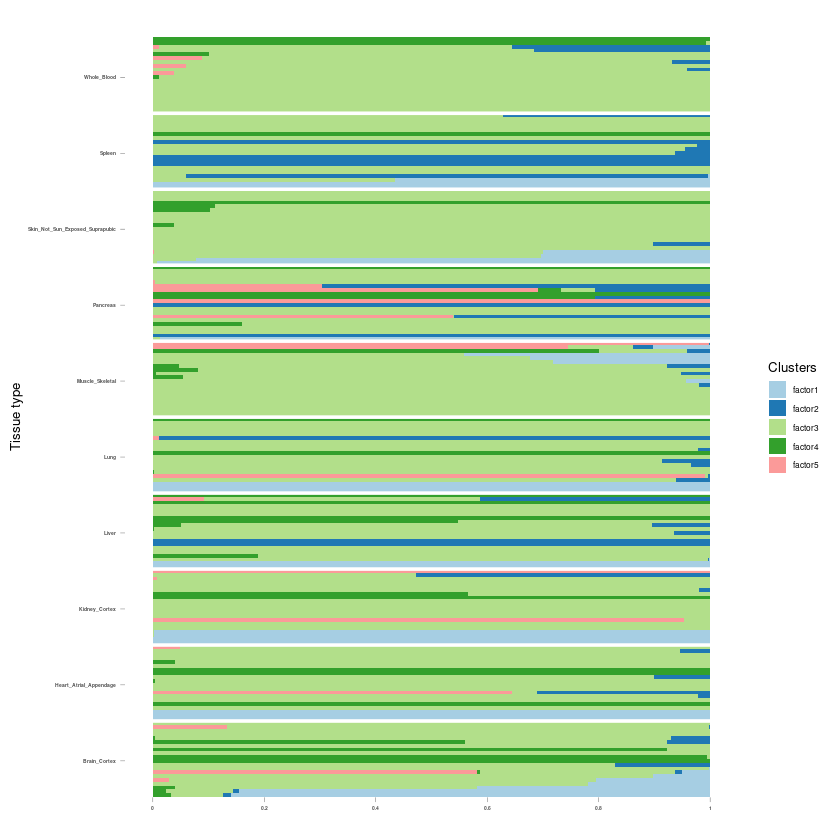

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


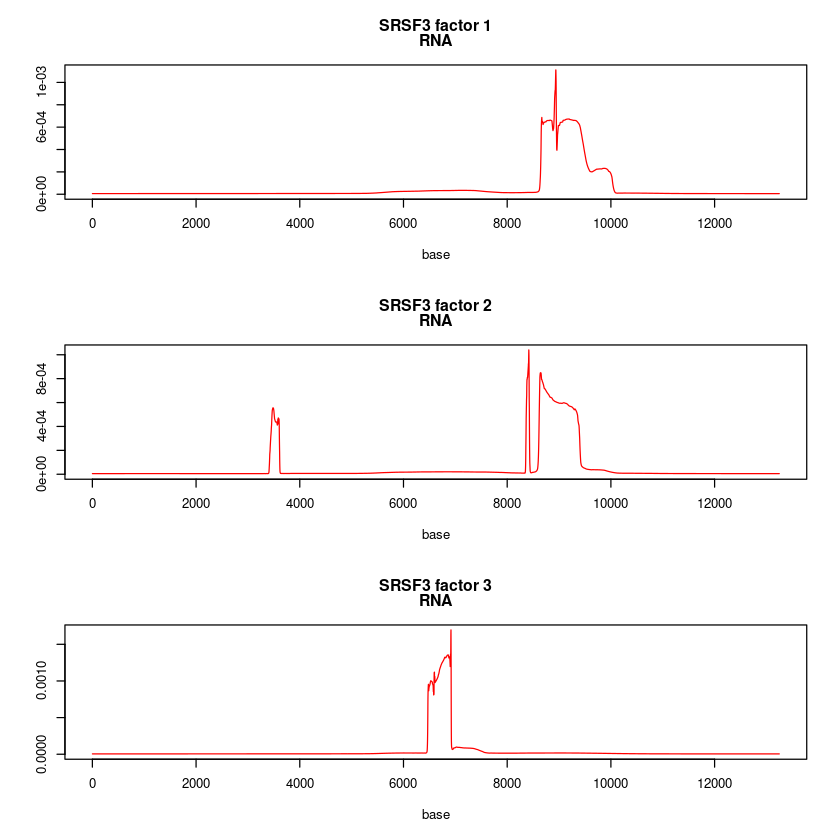

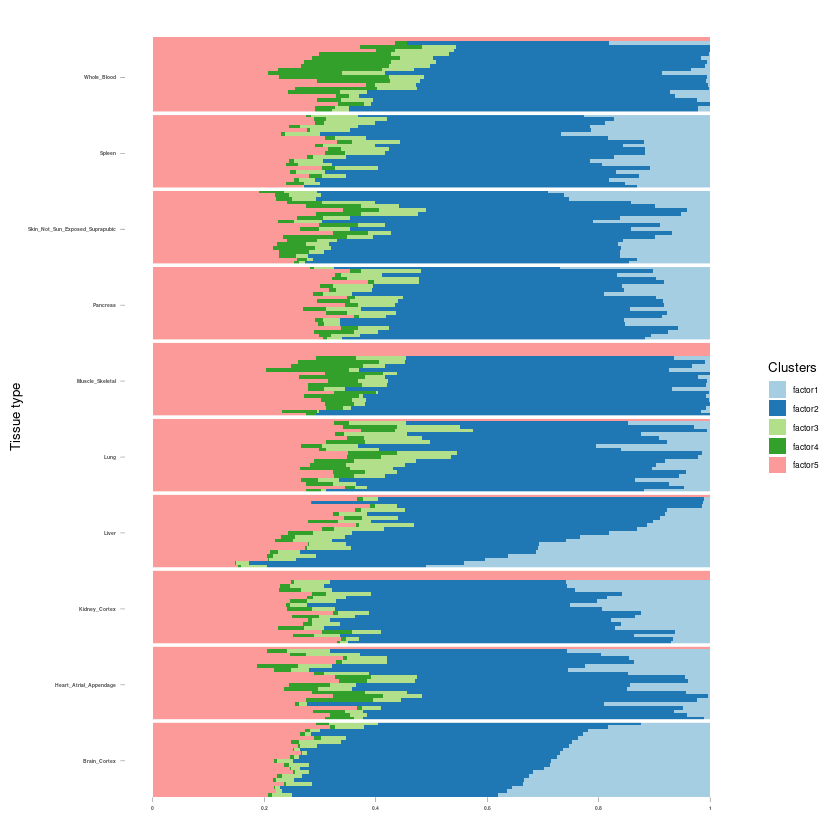

In [9]:
for (g in gene_list) {
    save_fit (g)
}

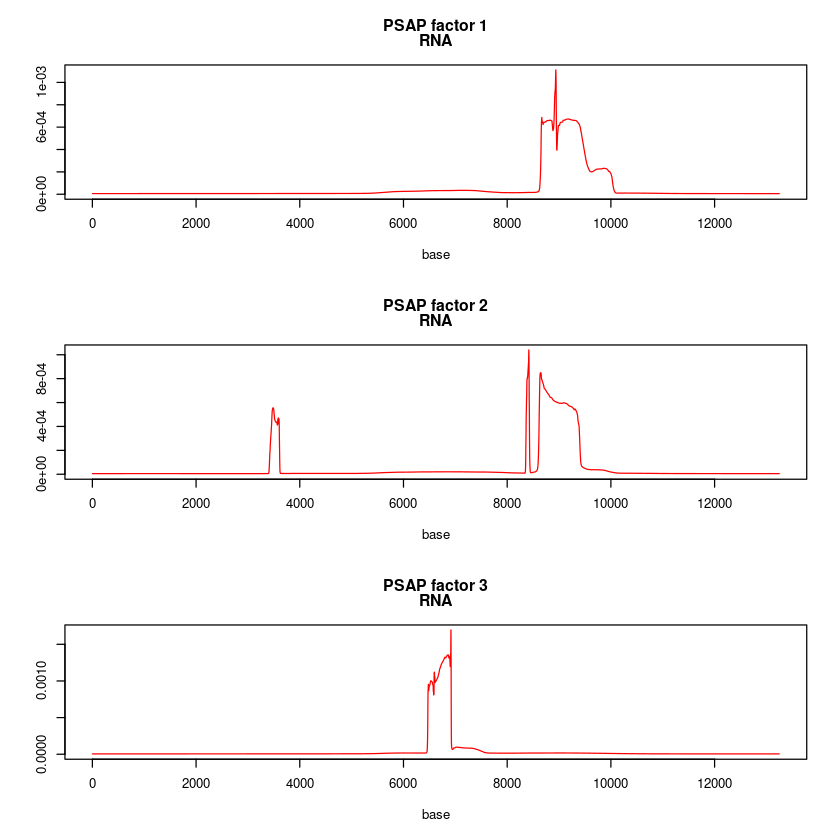

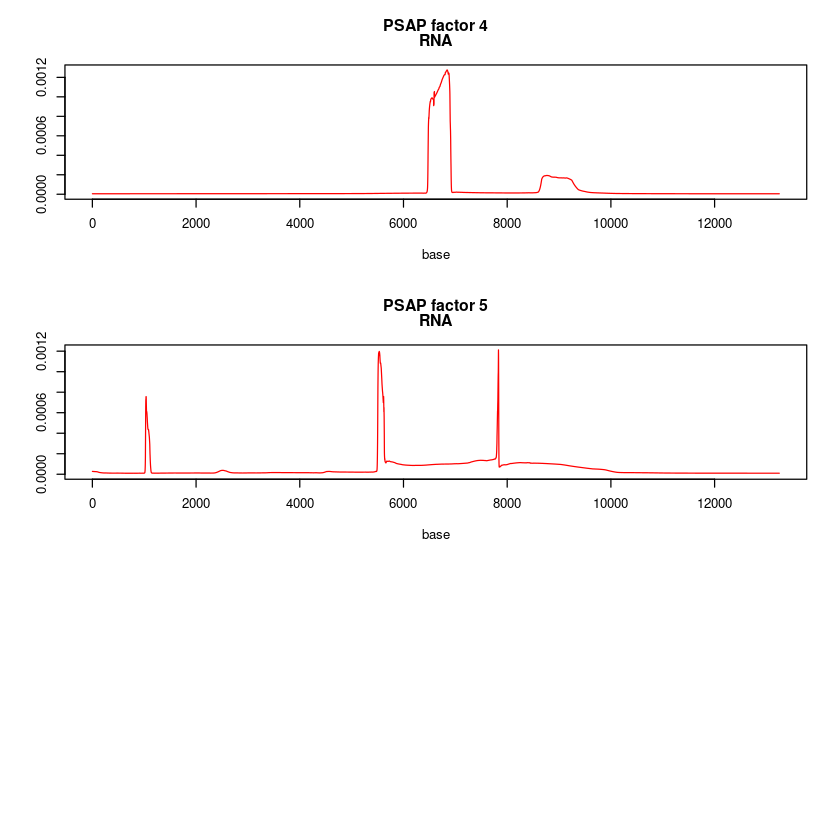

In [5]:

fit = readRDS('../code/stm_models/SRSF3.sgom_K5.rds')
summary_study(fit, 5, method='sgom', gene='PSAP')

# x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

# colnames(x) <- colnames(fit$geneCounts)
# write.table(x[brain_samples,], '../../plots/stm_plots/PSAP_stm.tab', sep='\t', quote=FALSE)

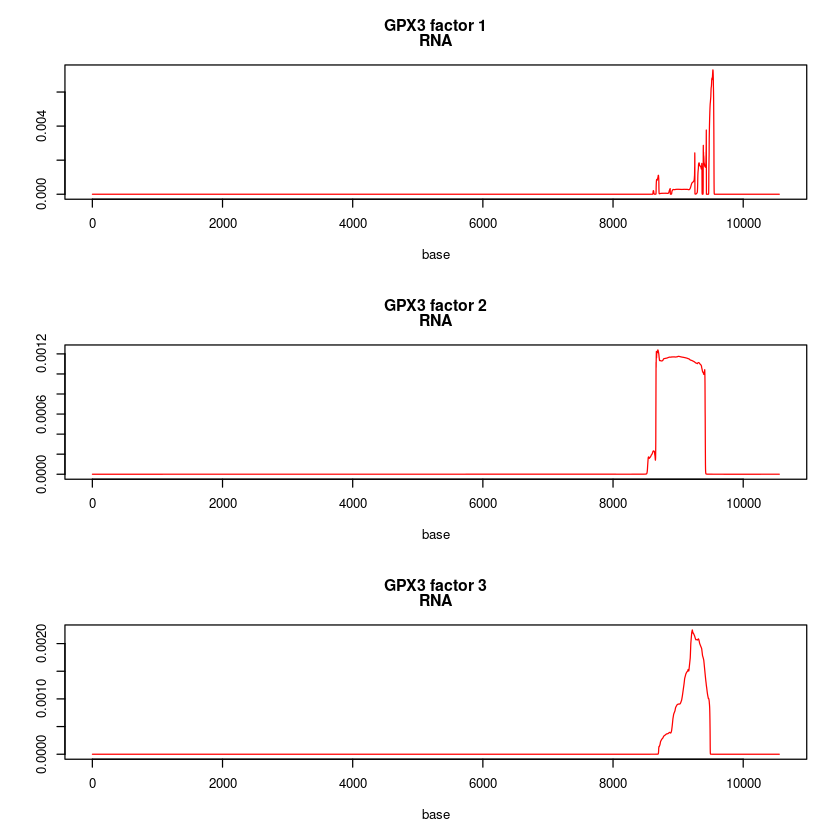

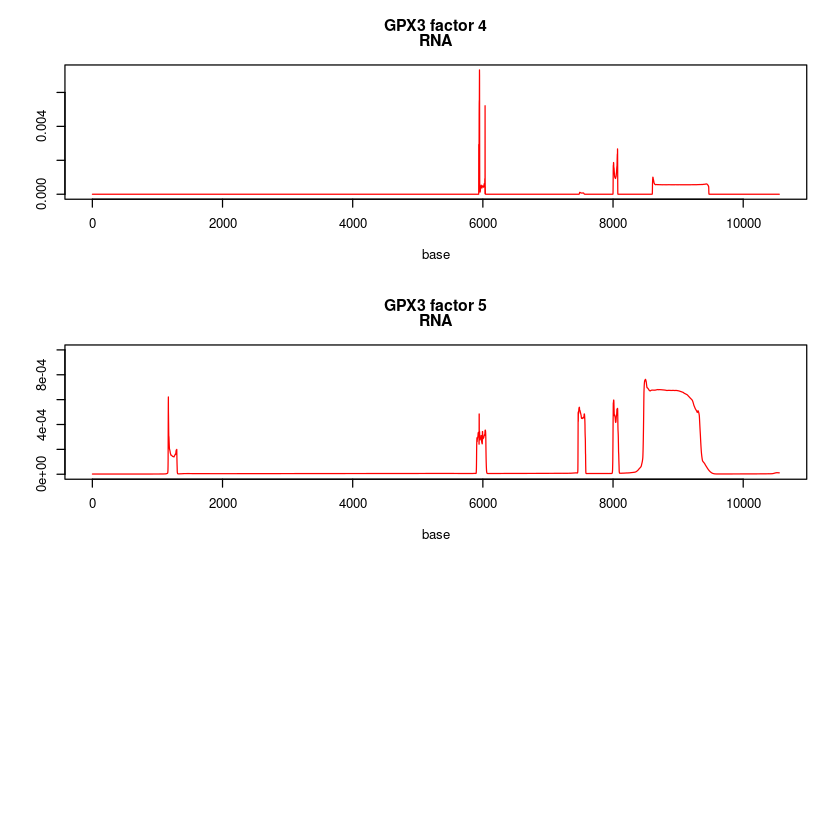

In [113]:
fit = readRDS('../code/stm_models/GPX3.sgom_K5.rds')
summary_study(fit, 5, method='sgom', gene='GPX3')

x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

colnames(x) <- colnames(fit$geneCounts)
write.table(x[brain_samples,], '../../plots/stm_plots/GPX3_stm.tab', sep='\t', quote=FALSE)

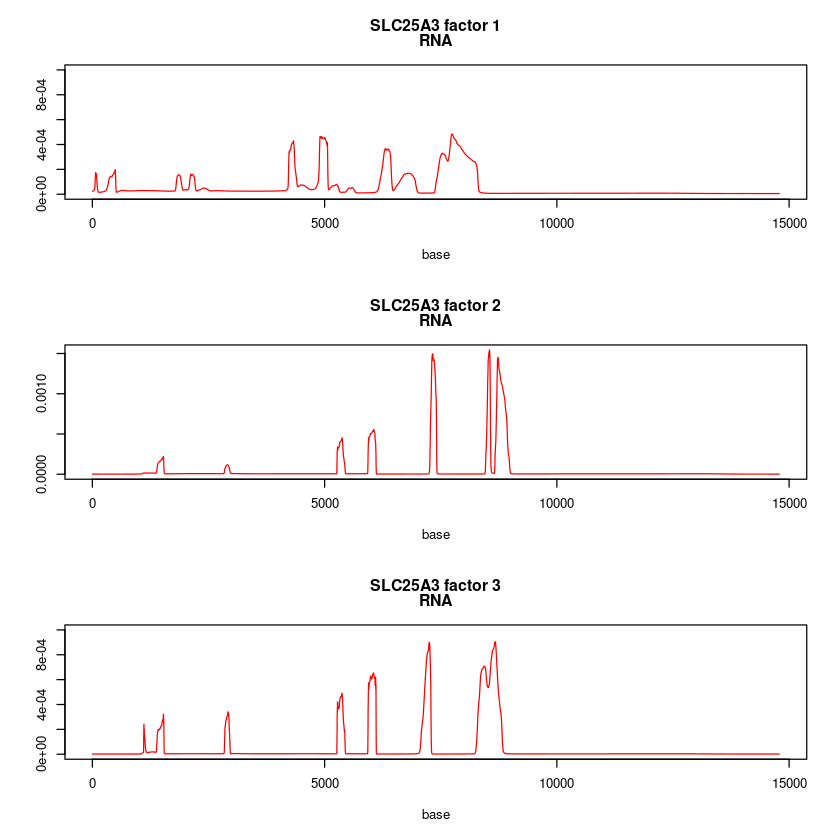

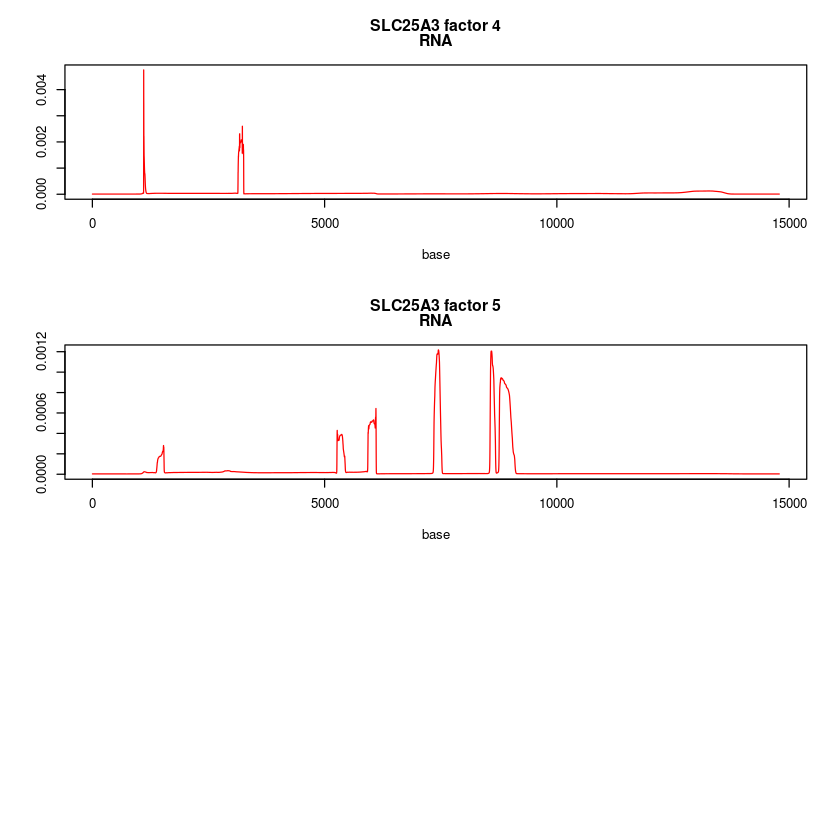

In [94]:
fit = readRDS('../code/stm_models/SLC25A3.sgom_K5.rds')
summary_study(fit, 5, method='sgom', gene='SLC25A3')

x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

colnames(x) <- colnames(fit$geneCounts)
write.table(x[brain_samples,], '../../plots/stm_plots/SLC25A3_stm.tab', sep='\t', quote=FALSE)

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


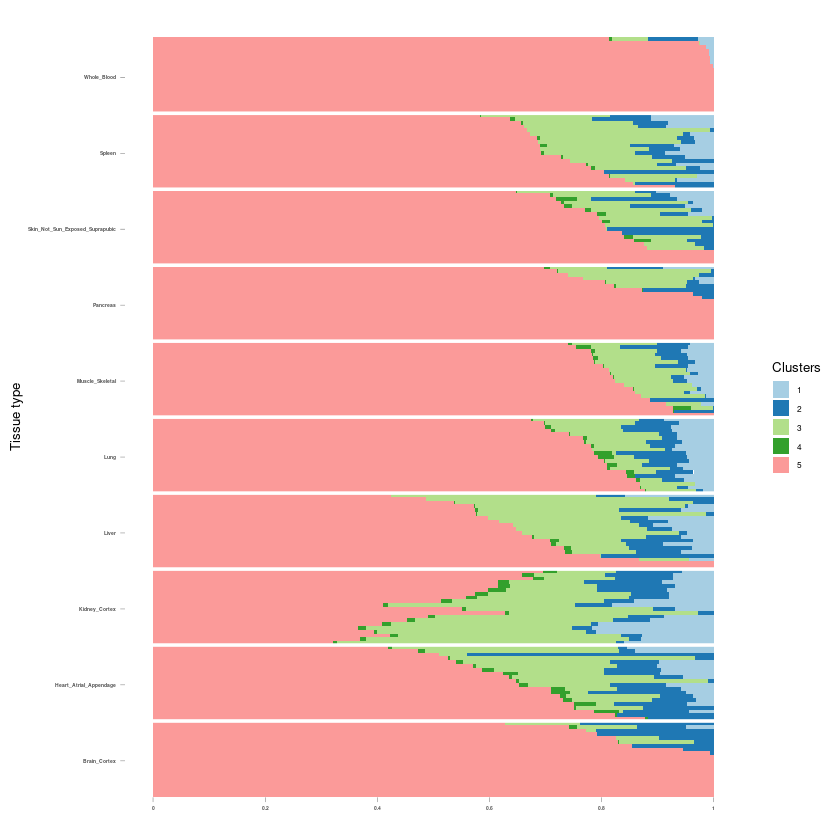

In [114]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

library(CountClust)

# row.names(fit$geneCounts) <- row.names(annotation)
# row.names(fit$fit_sgom$pi) <- row.names(annotation)

indis = row.names(fit$geneCounts)
tissue_label = c()
tissue_label <- annotation[rownames(fit$geneCounts),]$tissue_id
annotation = data.frame(sample_id = indis,tissue_label = tissue_label)
EL = fit$fit_sgom$pi
print(StructureGGplot(EL,annotation = annotation,
                  palette = RColorBrewer::brewer.pal(5,  "Paired"),
                  ))

In [6]:
fit$fit_sgom$pi

GTEX-1192W-0226-SM-5EGGT,3.968694e-02,4.898332e-01,8.702132e-02,4.976698e-02,0.3336916
GTEX-1192X-3126-SM-5N9BY,2.471301e-01,4.152504e-01,7.548848e-02,1.497015e-02,0.2471609
GTEX-11EI6-0826-SM-5985V,6.130790e-03,4.189072e-01,1.404286e-01,6.172722e-02,0.3728063
GTEX-11EMC-0006-SM-5O9DN,1.729001e-03,5.250375e-01,7.172635e-02,1.471152e-01,0.2543919
GTEX-11O72-0326-SM-5986D,3.239306e-02,5.512339e-01,3.928262e-02,1.291575e-01,0.2479329
GTEX-11OF3-0726-SM-5BC4Z,3.078218e-01,3.450715e-01,6.740298e-02,2.134026e-03,0.2775697
GTEX-11OF3-1326-SM-5N9FJ,1.981994e-24,4.555235e-09,3.066045e-13,3.992683e-18,1.0000000
GTEX-11ONC-1026-SM-5GU64,1.470142e-01,4.659146e-01,8.045057e-02,1.791738e-02,0.2887032
GTEX-11P82-0006-SM-5N9FY,1.727137e-04,6.083777e-01,1.255517e-02,4.706884e-02,0.3318256
GTEX-11WQK-0726-SM-5GU71,4.663673e-57,1.721200e-41,2.298308e-22,6.296630e-26,1.0000000
GTEX-11XUK-2226-SM-5CVLL,2.113429e-02,5.619957e-01,3.684311e-02,1.175960e-01,0.2624309


In [12]:
dim(fit$fit_sgom$phi)

[1]     5 28439

In [81]:
x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

colnames(x) <- colnames(fit$geneCounts)
write.table(x[brain_samples,], '../../plots/stm_plots/PSAP_stm.tab', sep='\t', quote=FALSE)

In [105]:
phi <- fit$fit_sgom$phi
colnames(phi) <- colnames(fit$geneCounts)

In [106]:
phi

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

chr12.98592592,chr12.98592593,chr12.98592594,chr12.98592595,chr12.98592596,chr12.98592597,chr12.98592598,chr12.98592599,chr12.98592600,chr12.98592601,...,chr12.98607370,chr12.98607371,chr12.98607372,chr12.98607373,chr12.98607374,chr12.98607375,chr12.98607376,chr12.98607377,chr12.98607378,chr12.98607379
2.385307e-05,2.395286e-05,2.405894e-05,2.417731e-05,2.430623e-05,2.444597e-05,2.459498e-05,2.475339e-05,2.491783e-05,2.482236e-05,...,5.579955e-06,5.579996e-06,5.580037e-06,5.580079e-06,5.580121e-06,5.580163e-06,5.580206e-06,5.580249e-06,5.580292e-06,5.580336e-06
2.036981e-06,2.036985e-06,2.036989e-06,2.036993e-06,2.036997e-06,2.037001e-06,2.037005e-06,2.037010e-06,2.037014e-06,2.037018e-06,...,2.052276e-06,2.052276e-06,2.052275e-06,2.052274e-06,2.052274e-06,2.052273e-06,2.052272e-06,2.052272e-06,2.052271e-06,2.052270e-06
1.581213e-06,1.581254e-06,1.581296e-06,1.581337e-06,1.581377e-06,1.581419e-06,1.581460e-06,1.581501e-06,1.581542e-06,1.581582e-06,...,1.636971e-06,1.637097e-06,1.637223e-06,1.637348e-06,1.637474e-06,1.637599e-06,1.637723e-06,1.637848e-06,1.637973e-06,1.638097e-06
6.666752e-06,6.666771e-06,6.666791e-06,6.666810e-06,6.666830e-06,6.666851e-06,6.666872e-06,6.666893e-06,6.666914e-06,6.666936e-06,...,6.624025e-06,6.624017e-06,6.624010e-06,6.624003e-06,6.623996e-06,6.623990e-06,6.623985e-06,6.623982e-06,6.623978e-06,6.623975e-06
3.128963e-06,3.128971e-06,3.128979e-06,3.128988e-06,3.128997e-06,3.129006e-06,3.129015e-06,3.129025e-06,3.129034e-06,3.129044e-06,...,3.201185e-06,3.201098e-06,3.201011e-06,3.200924e-06,3.200837e-06,3.200751e-06,3.200666e-06,3.200581e-06,3.200497e-06,3.200413e-06


In [74]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

brain_samples <- rownames(x)[annotation[rownames(x),]$tissue_id == "Kidney_Cortex"]
pancreas_samples <- rownames(x)[annotation[rownames(x),]$tissue_id == "Whole_Blood"]

In [32]:
annotation[rownames(x),]$tissue_id

[1] Pancreas                        Heart_Atrial_Appendage         
  [3] Pancreas                        Brain_Cortex                   
  [5] Liver                           Whole_Blood                    
  [7] Skin_Not_Sun_Exposed_Suprapubic Muscle_Skeletal                
  [9] Pancreas                        Heart_Atrial_Appendage         
 [11] Spleen                          Kidney_Cortex                  
 [13] Brain_Cortex                    Lung                           
 [15] Muscle_Skeletal                 Spleen                         
 [17] Lung                            Muscle_Skeletal                
 [19] Spleen                          Brain_Cortex                   
 [21] Muscle_Skeletal                 Lung                           
 [23] Muscle_Skeletal                 Liver                          
 [25] Brain_Cortex                    Liver                          
 [27] Heart_Atrial_Appendage          Brain_Cortex                   
 [29] Muscle_Skeletal                 Brain_Cortex                   
 [31] Skin_Not_Sun_Exposed_Suprapubic Lung                           
 [33] Kidney_Cortex                   Pancreas                       
 [35] Whole_Blood                     Whole_Blood                    
 [37] Whole_Blood                     Lung                           
 [39] Spleen                          Brain_Cortex                   
 [41] Pancreas                        Liver                          
 [43] Heart_Atrial_Appendage          Pancreas                       
 [45] Brain_Cortex                    Spleen                         
 [47] Whole_Blood                     Liver                          
 [49] Kidney_Cortex                   Muscle_Skeletal                
 [51] Kidney_Cortex                   Whole_Blood                    
 [53] Skin_Not_Sun_Exposed_Suprapubic Skin_Not_Sun_Exposed_Suprapubic
 [55] Heart_Atrial_Appendage          Whole_Blood                    
 [57] Liver                           Pancreas                       
 [59] Liver                           Kidney_Cortex                  
 [61] Whole_Blood                     Kidney_Cortex                  
 [63] Whole_Blood                     Skin_Not_Sun_Exposed_Suprapubic
 [65] Pancreas                        Heart_Atrial_Appendage         
 [67] Kidney_Cortex                   Heart_Atrial_Appendage         
 [69] Spleen                          Liver                          
 [71] Skin_Not_Sun_Exposed_Suprapubic Whole_Blood                    
 [73] Heart_Atrial_Appendage          Lung                           
 [75] Liver                           Spleen                         
 [77] Brain_Cortex                    Spleen                         
 [79] Skin_Not_Sun_Exposed_Suprapubic Liver                          
 [81] Heart_Atrial_Appendage          Heart_Atrial_Appendage         
 [83] Kidney_Cortex                   Kidney_Cortex                  
 [85] Pancreas                        Skin_Not_Sun_Exposed_Suprapubic
 [87] Muscle_Skeletal                 Kidney_Cortex                  
 [89] Pancreas                        Lung                           
 [91] Spleen                          Spleen                         
 [93] Lung                            Skin_Not_Sun_Exposed_Suprapubic
 [95] Brain_Cortex                    Lung                           
 [97] Skin_Not_Sun_Exposed_Suprapubic Muscle_Skeletal                
 [99] Lung                            Muscle_Skeletal                
54 Levels: Adipose_Subcutaneous Adipose_Visceral_Omentum ... Whole_Blood

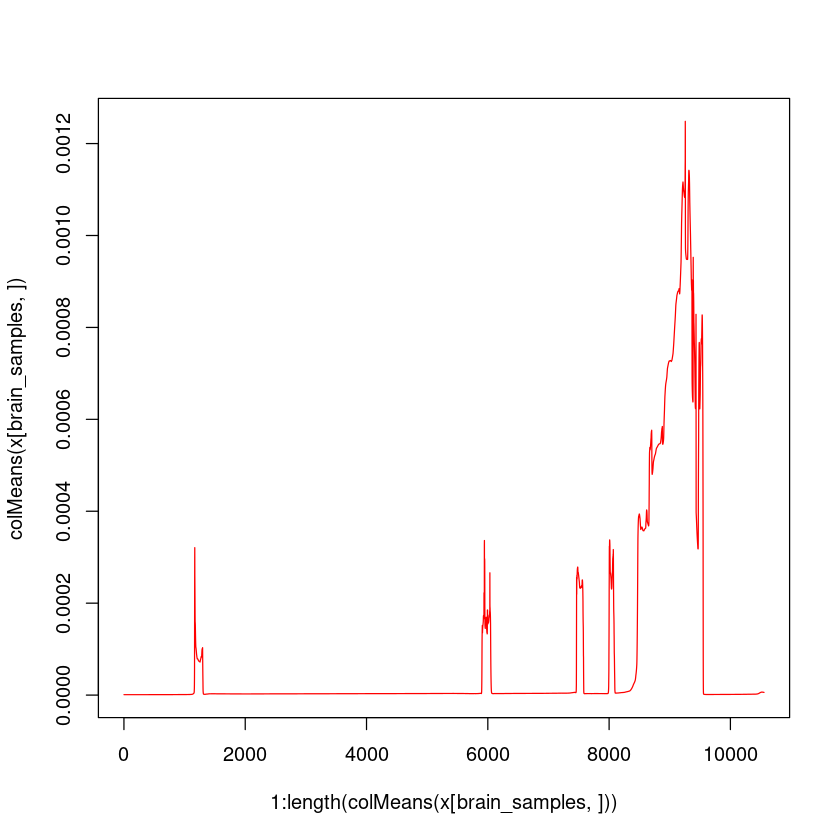

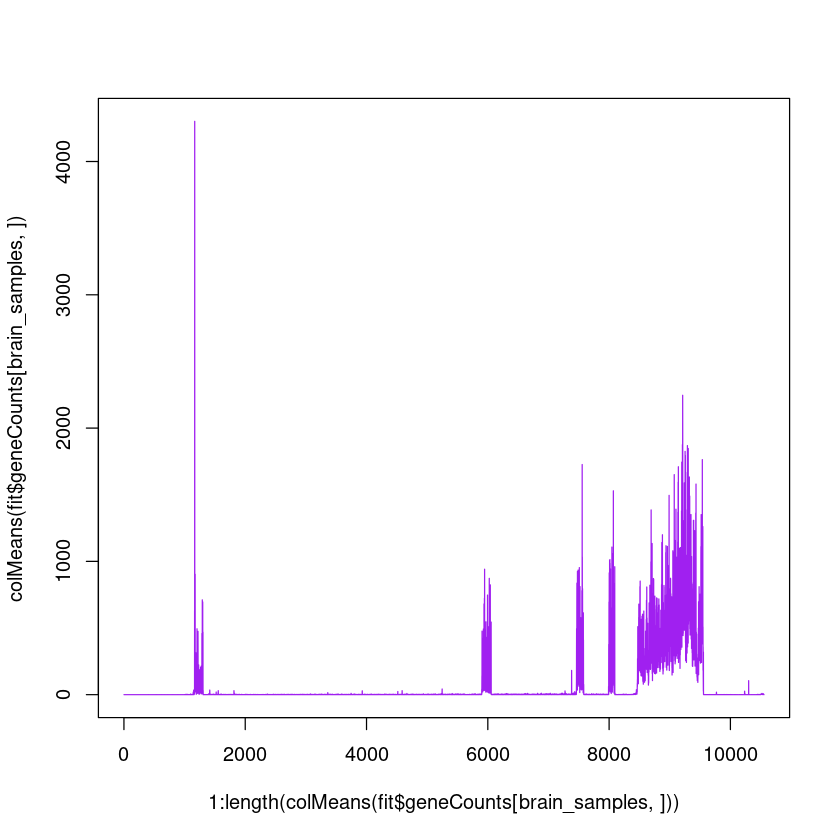

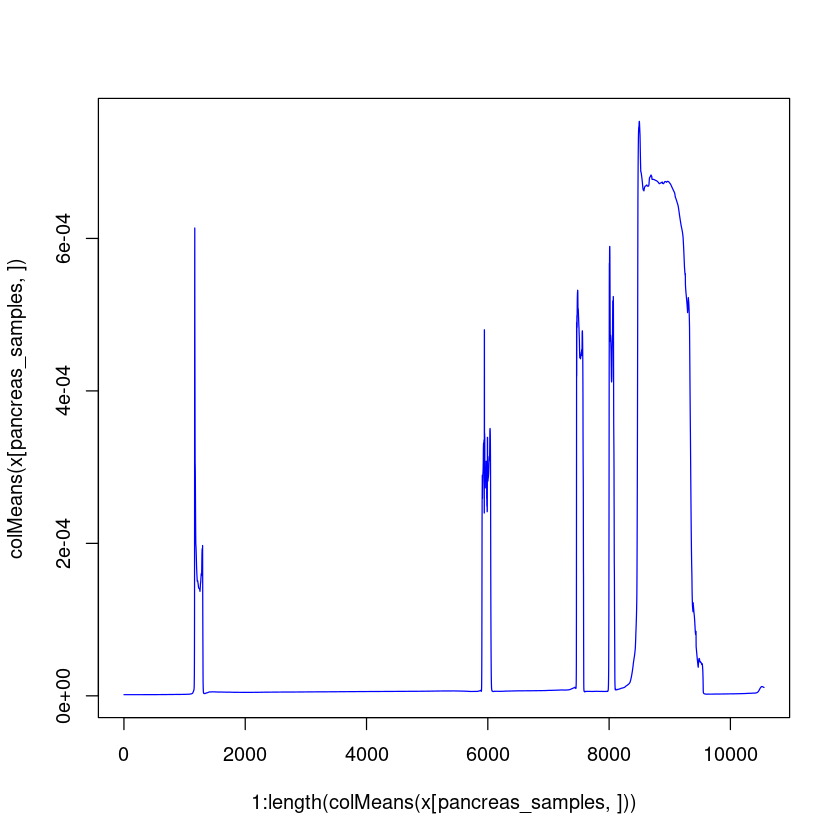

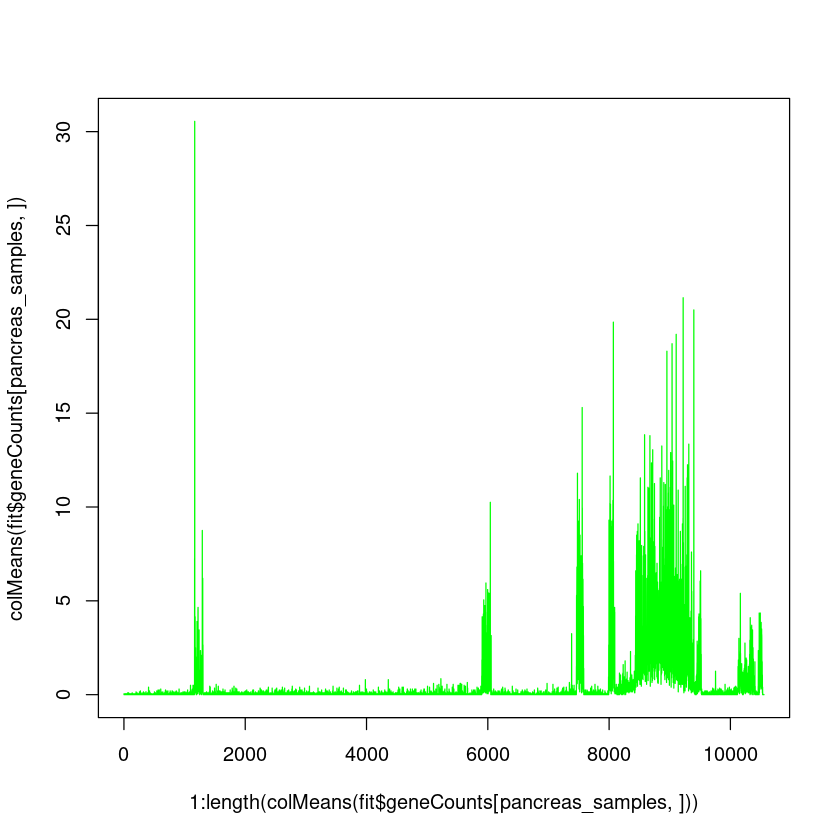

In [75]:
plot(1:length(colMeans(x[brain_samples,])),
     colMeans(x[brain_samples,]),type='l', col='red')


plot(1:length(colMeans(fit$geneCounts[brain_samples,])),
     colMeans(fit$geneCounts[brain_samples,]),type='l', col='purple')


plot(1:length(colMeans(x[pancreas_samples,])),
     colMeans(x[pancreas_samples,]),type='l', col='blue')

plot(1:length(colMeans(fit$geneCounts[pancreas_samples,])),
     colMeans(fit$geneCounts[pancreas_samples,]),type='l', col='green')

In [76]:
colnames(x) <- colnames(fit$geneCounts)
write.table(x[brain_samples,], '../../plots/stm_plots/kidney_gpx3_stm.tab', sep='\t', quote=FALSE)

colnames(x) <- colnames(fit$geneCounts)
write.table(x[pancreas_samples,], '../../plots/stm_plots/blood_gpx3_stm.tab', sep='\t', quote=FALSE)

In [51]:
x[pancreas_samples,]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]

In [63]:
fit$fit_sgom$phi

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

5.932619e-06,5.932996e-06,5.933376e-06,5.933749e-06,5.934126e-06,5.934502e-06,5.934883e-06,5.935268e-06,5.935650e-06,5.936034e-06,...,5.752884e-06,5.752849e-06,5.752814e-06,5.752779e-06,5.752743e-06,5.752708e-06,5.752673e-06,5.752637e-06,5.752601e-06,5.752565e-06
6.296309e-06,6.296690e-06,6.297071e-06,6.297445e-06,6.297821e-06,6.298195e-06,6.298574e-06,6.298958e-06,6.299340e-06,6.299724e-06,...,6.114573e-06,6.114573e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06
4.959658e-06,4.959973e-06,4.960290e-06,4.960603e-06,4.960918e-06,4.961234e-06,4.961556e-06,4.961883e-06,4.962210e-06,4.962538e-06,...,4.266871e-06,4.266871e-06,4.266871e-06,4.266871e-06,4.266870e-06,4.266870e-06,4.266870e-06,4.266870e-06,4.266870e-06,4.266870e-06
9.536064e-06,9.536268e-06,9.536475e-06,9.536679e-06,9.536891e-06,9.537105e-06,9.537327e-06,9.537560e-06,9.537793e-06,9.538032e-06,...,7.024549e-06,7.024494e-06,7.024440e-06,7.024386e-06,7.024331e-06,7.024277e-06,7.024223e-06,7.024170e-06,7.024116e-06,7.024062e-06
4.193097e-06,4.193318e-06,4.193539e-06,4.193757e-06,4.193978e-06,4.194200e-06,4.194426e-06,4.194657e-06,4.194888e-06,4.195119e-06,...,4.473052e-06,4.473060e-06,4.473068e-06,4.473077e-06,4.473085e-06,4.473094e-06,4.473102e-06,4.473112e-06,4.473121e-06,4.473131e-06


In [157]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)


In [162]:
indis = row.names(fit$geneCounts)

In [179]:
dim(annotation)

[1] 100   2

In [189]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

annotation['GTEX-1H1ZS-3026-SM-9KNUJ',]

,bam_file,bam_index,participant,tissue_id,tissue_site_detail
,<fct>,<fct>,<fct>,<fct>,<fct>
GTEX-1H1ZS-3026-SM-9KNUJ,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da62108/GTEx_Analysis_2017-06-05_v8_RNAseq_BAM_files/GTEX-1H1ZS-3026-SM-9KNUJ.Aligned.sortedByCoord.out.patched.md.bam,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da62108/GTEx_Analysis_2017-06-05_v8_RNAseq_BAM_files/GTEX-1H1ZS-3026-SM-9KNUJ.Aligned.sortedByCoord.out.patched.md.bam.bai,GTEX-1H1ZS,Brain_Cortex,Brain - Cortex


In [194]:
table(annotation[rownames(fit$geneCounts),]$tissue_id)


                 Adipose_Subcutaneous              Adipose_Visceral_Omentum 
                                    0                                     0 
                        Adrenal_Gland                          Artery_Aorta 
                                    0                                     0 
                      Artery_Coronary                         Artery_Tibial 
                                    0                                     0 
                              Bladder                        Brain_Amygdala 
                                    0                                     0 
 Brain_Anterior_cingulate_cortex_BA24           Brain_Caudate_basal_ganglia 
                                    0                                     0 
          Brain_Cerebellar_Hemisphere                      Brain_Cerebellum 
                                    0                                     0 
                         Brain_Cortex              Brain_Frontal_Cortex_BA9

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


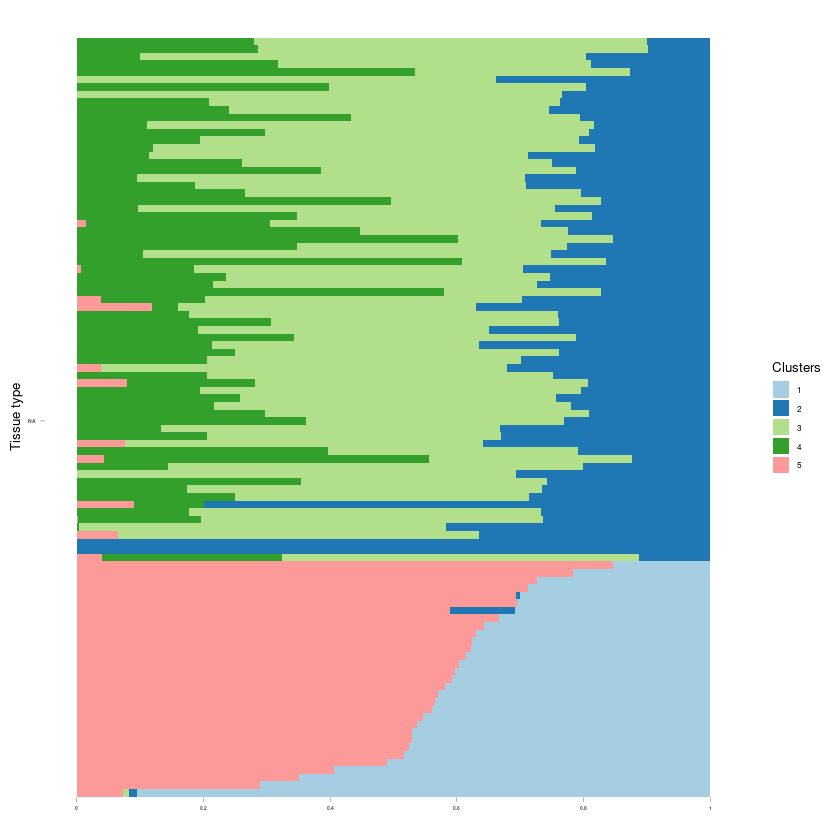

In [115]:
annotation = read.table('../../gtex_download/sample.100.tab.gz', sep='\t', header=1, row.names=1)

library(CountClust)

row.names(fit$geneCounts) <- row.names(annotation)
row.names(fit$fit_sgom$pi) <- row.names(annotation)

indis = rownames(fit$geneCounts)
 tissue_label = c()
 for(i in 1:length(indis)){
   tissue_label[i] <- annotation$tissue_id[i]
 }
annotation = annotation = read.table('../../gtex_download/sample.100.tab.gz', sep='\t', header=1, row.names=1)

EL = fit$fit_sgom$pi
print(StructureGGplot(EL,annotation = annotation$tissue_id,
                  palette = RColorBrewer::brewer.pal(5,  "Paired"),
                  ))